### Circuit Diagram: Qubit State After Creation

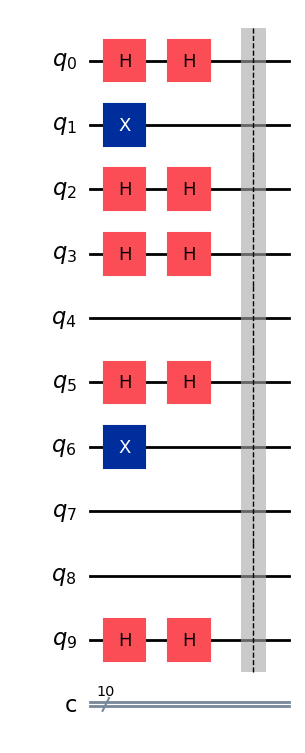

### Recipient Reading Data from Quantum Bits

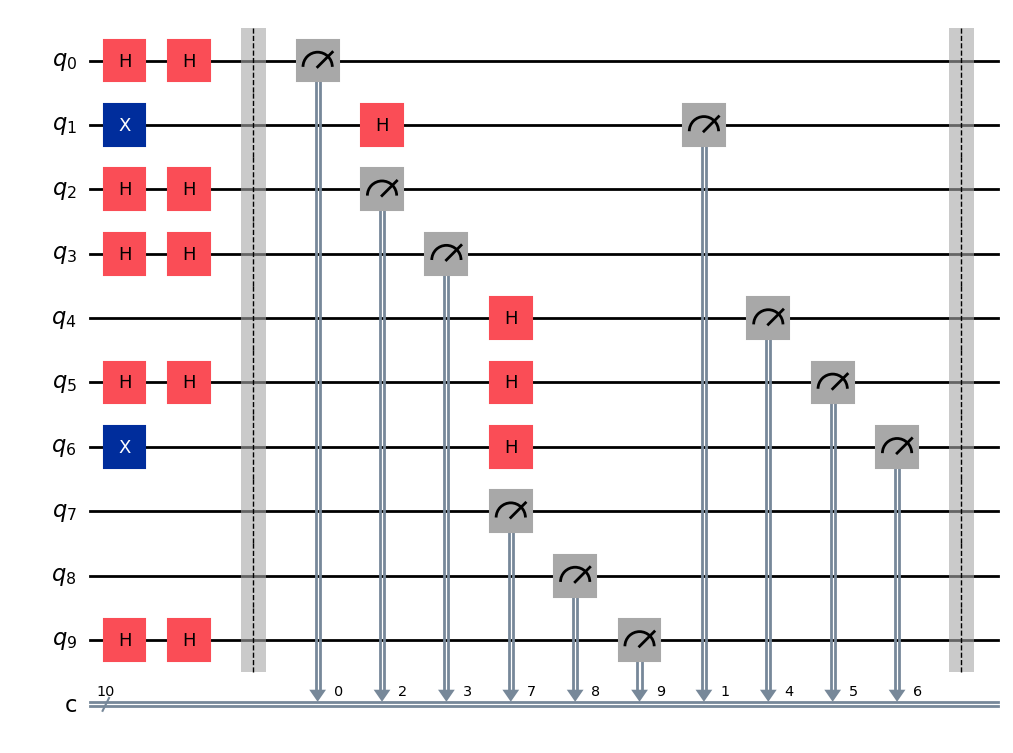

### Key Sifting Process

Alice's bases:        [1 0 1 1 0 1 0 0 0 1]
Bob's bases:          [0 1 0 0 1 1 1 0 0 0]
Matching bases at positions:  [5, 7, 8]
Sifted key:           [0, 0, 0]
Initial bits          [0 1 0 0 0 0 1 0 0 0]
Final bits:           [0 0 0 0 0 1 0 0 0 0]


### Circuit Diagram: Qubit State After Creation

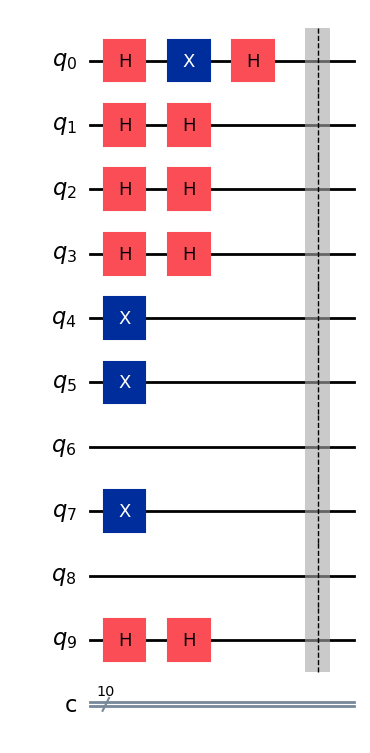

### Circuit Diagram: With Eavesdropping

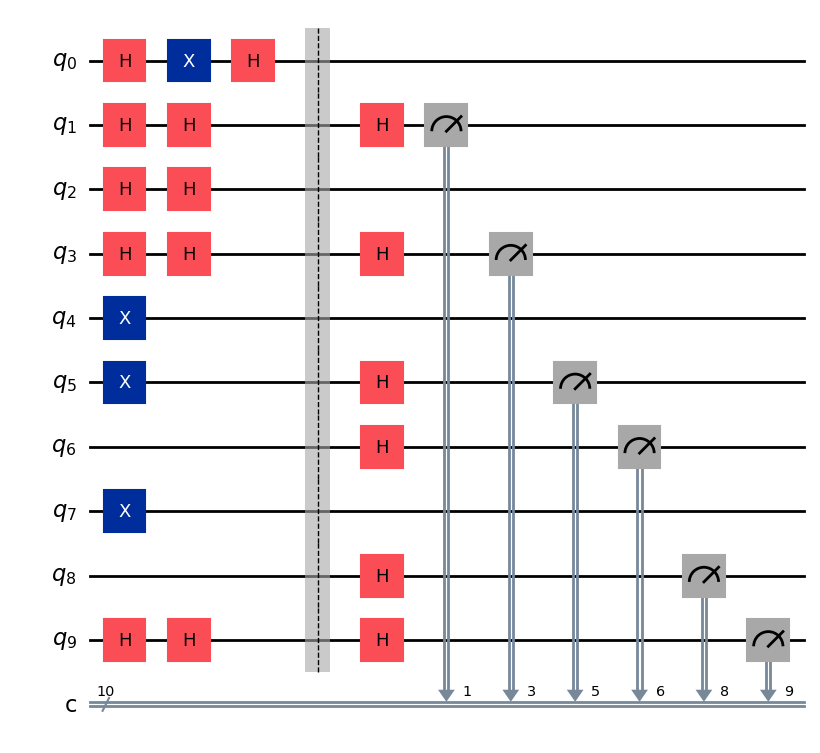

Initial Bits:         [1 0 0 0 1 1 0 1 0 0]
After Eavesdropping:  [1 1 0 0 0 0 0 0 0 0]


### Recipient Reading Data from Quantum Bits

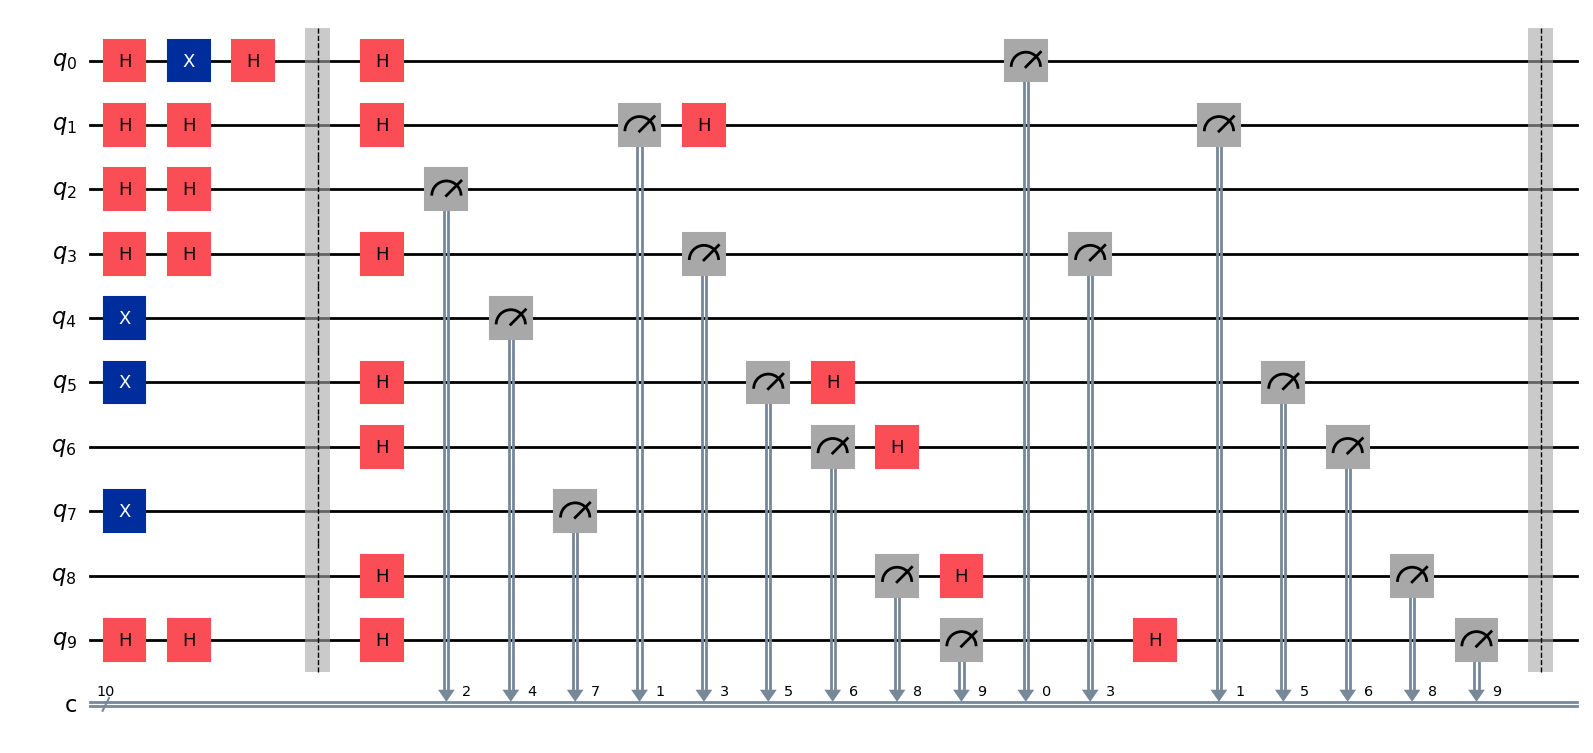

Initial Bits:         [1 0 0 0 1 1 0 1 0 0]
After Eavesdropping:  [1 1 0 0 0 0 0 0 0 0]
Final Bits:       [0 1 1 0 1 1 0 0 1 0]


### Key Sifting Process

Alice's bases:        [1 1 1 1 0 0 0 0 0 1]
Bob's bases:          [1 1 0 0 0 1 1 0 1 1]
Matching bases at positions:  [0, 1, 4, 7, 9]
Sifted key:           [1, 0, 1, 1, 0]


### Conclusion

Eavesdropping Detected:  True


In [4]:
# Importing necessary modules from Qiskit for building and visualizing quantum circuits.
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from IPython.display import display, Markdown

# Initialize the simulator from Qiskit Aer, which allows for quantum circuit simulation.
simulator = AerSimulator()

# Define a function to create a quantum circuit based on the BB84 protocol.
def create_bb84_circuit(bits, bases):
    """
    Creates a quantum circuit for the BB84 protocol.
    Each qubit is prepared based on the corresponding bit and basis value.
    - bits: The array of bits (1 or 0) representing the information to be encoded.
    - bases: The array of bases (1 or 0) where 0 is for the standard basis and 1 is for the Hadamard (diagonal) basis.
    """
    num_qubits = len(bits) # Determine the number of qubits needed.
    qc = QuantumCircuit(num_qubits, num_qubits) # Create a quantum circuit with qubits and classical bits.

    # Loop over each qubit and apply quantum gates based on bit and basis values.
    for i in range(num_qubits):
        if bases[i] == 1: # If the basis is 1, apply a Hadamard gate to create superposition.
            qc.h(i)
        if bits[i] == 1: # If the bit is 1, apply an X gate to flip the qubit state.
            qc.x(i)
        if bases[i] == 1: # If the basis is 1, apply another Hadamard gate to change to the Hadamard basis.
            qc.h(i)
    qc.barrier() # Insert a barrier for visual separation of the circuit's stages.
    return qc, bits, bases # Return the prepared circuit along with bits and bases for reference

# A function to visualize the state of qubits immediately after their creation and encoding.
def visualize_qubit_creation(qc):
    """
    Visualizes the quantum state of qubits after they are created in the circuit.
    - qc: The quantum circuit with prepared qubits.
    """
    display(Markdown("### Circuit Diagram: Qubit State After Creation"))
    state = Statevector.from_instruction(qc) # Extract the statevector from the circuit.
    plot_bloch_multivector(state, title="Qubit States After Creation") # Plot the state on Bloch spheres.
    display(qc.draw(output='mpl')) # Draw and display the circuit using Matplotlib.

# A function to measure qubits within the circuit based on the specified bases.
def measure_in_bases(qc, bases):
    """
    Measures the qubits in a quantum circuit based on the provided bases.
    - qc: The quantum circuit with prepared qubits.
    - bases: The array of bases to determine in which basis the qubit should be measured.
    """
    for i, base in enumerate(bases):
        if base == 1: # If the base is 1, apply a Hadamard gate before measurement to measure in the Hadamard basis.
            qc.h(i)
        qc.measure(i, i) # Measure the qubit and store the result in the corresponding classical bit.
    qc.barrier()

def visualize_measure_in_bases(qc):
    display(Markdown("### Recipient Reading Data from Quantum Bits"))
    display(qc.draw(output='mpl')) # Draw and display the circuit with eavesdropping using Matplotlib.

def eavesdrop(qc, num_qubits):
    """
    Adds eavesdropping to the circuit by inserting measurements at random points.
    - qc: The quantum circuit with prepared qubits.
    - num_qubits: The number of qubits in the circuit.
    """
    eve_bases = np.random.randint(2, size=num_qubits) # Eve chooses random bases to measure the qubits.
    for i, base in enumerate(eve_bases):
        if base == 1: # If Eve's base is 1, apply a Hadamard gate to measure in the Hadamard basis.
            qc.h(i)
            qc.measure(i, i) # Eve performs the measurement.
    
def visualize_eavesdropping(qc):
    """
    - qc: The quantum circuit where eavesdropping has been added.
    """
    display(Markdown("### Circuit Diagram: With Eavesdropping"))
    display(qc.draw(output='mpl')) # Draw and display the circuit with eavesdropping using Matplotlib.

def sift_and_visualize(bits, bases, bob_bases):
    """
    Sifts the key from the bit sequences based on matching bases and visualizes the sifting process.
    - bits: The array of bits representing the original encoded information.
    - bases: The array of bases used by Alice for encoding her bits.
    - bob_bases: The array of bases used by Bob for his measurements.
    """
    display(Markdown("### Key Sifting Process"))
    sifted_key = [] # Initialize an array to hold the sifted key bits.
    matching_bases = [] # To record the positions where bases match.

    # Compare Alice's and Bob's bases to sift the key.
    for i in range(len(bases)):
        if bases[i] == bob_bases[i]: # If the bases match, the bit is part of the sifted key.
            sifted_key.append(bits[i])
            matching_bases.append(i) # Add index to matching list.

    print("Alice's bases:       ", bases)
    print("Bob's bases:         ", bob_bases)
    print("Matching bases at positions: ", matching_bases)
    print("Sifted key:          ", sifted_key) # Print the sifted key.
    return sifted_key # Return the sifted key

# Clean up output
def string_to_bit_array(bits):
    result = "["
    for i, character in enumerate(bits):
        result += character
        if i != len(bits) - 1:
            result += " "
    result += "]"
    return result
    
# Simulation without eavesdropping

# Set up the simulation paramters: number of qubits and random bits and bases for Alice and Bob.
num_qubits = 10
alice_bits = np.random.randint(2, size=num_qubits)
alice_bases = np.random.randint(2, size=num_qubits)
bob_bases = np.random.randint(2, size=num_qubits)

# Create and visualize the BB84 circuit.
bb84_circ, bits, bases = create_bb84_circuit(alice_bits, alice_bases)
visualize_qubit_creation(bb84_circ) # Visualize the state of the qubits after creation.
measure_in_bases(bb84_circ, bob_bases) # Measure the qubits based on Bob's chosen bases.
visualize_measure_in_bases(bb84_circ) # Visualize Bob measuring the bits to read the data.

# Simulate the quantum circuit and obtain the results of the measurement.
compiled_circuit = transpile(bb84_circ, simulator) # Prepare the circuit for simulation.
job = simulator.run(compiled_circuit, shots=1) # Run the simulation with one shot.
result = job.result() # Retrieve the results from the simulation.
counts = result.get_counts(bb84_circ) # Get the counts of measurement outcomes.

# Visualization and analysis of the simulation results.
plot_histogram(counts) # Plot a histogram of the measurement outcomes.
sifted_key = sift_and_visualize(bits, bases, bob_bases) # Sift the key and visualize the process.

print("Initial bits         ", bits)
print("Final bits:          ", string_to_bit_array(list(counts.keys())[0]))

# Simulation with eavesdropping.

# Set up the simulation paramters: number of qubits and random bits and bases for Alice and Bob.
num_qubits = 10
alice_bits = np.random.randint(2, size=num_qubits)
alice_bases = np.random.randint(2, size=num_qubits)
bob_bases = np.random.randint(2, size=num_qubits)

# Create the BB84 circuit and add the eavesdropping sequence to it.
bb84_circ, bits, bases = create_bb84_circuit(alice_bits, alice_bases)
visualize_qubit_creation(bb84_circ) # Visualize the state of the qubits after creation.
eve_bases = eavesdrop(bb84_circ, num_qubits) # Simulate Eve's interception and eavesdropping.
visualize_eavesdropping(bb84_circ) # Visualize the circuit with eavesdropping.

# Simulate the quantum circuit and obtain the results of the measurement.
compiled_circuit = transpile(bb84_circ, simulator) # Prepare the circuit for simulation.
job = simulator.run(compiled_circuit, shots=1) # Run the simulation with one shot.
result = job.result() # Retrieve the results from the simulation.
counts = result.get_counts(bb84_circ) # Get the counts of measurement outcomes.
bits_after_eavesdropping = string_to_bit_array(list(counts.keys())[0])

print("Initial Bits:        ", bits)
print("After Eavesdropping: ", bits_after_eavesdropping)

# Now Bob reads from the modified bits:
measure_in_bases(bb84_circ, bob_bases) # Measure the qubits based on Bob's chosen bases.
visualize_measure_in_bases(bb84_circ) # Visualize Bob measuring the bits to read the data.

# Simulate the quantum circuit and obtain the results of the measurement.
compiled_circuit = transpile(bb84_circ, simulator) # Prepare the circuit for simulation.
job = simulator.run(compiled_circuit, shots=1) # Run the simulation with one shot.
result = job.result() # Retrieve the results from the simulation.
counts = result.get_counts(bb84_circ) # Get the counts of measurement outcomes.

print("Initial Bits:        ", bits)
print("After Eavesdropping: ", bits_after_eavesdropping)
print("Final Bits:      ", string_to_bit_array(list(counts.keys())[0]))

# Visualization and analysis of the simulation results.
plot_histogram(counts) # Plot a histogram of the measurement outcomes.
sifted_key = sift_and_visualize(bits, bases, bob_bases) # Sift the key and visualize the process.

# Conclude the demonstration with a check for eavesdropping.
display(Markdown("### Conclusion"))
print("Eavesdropping Detected: ", np.any(alice_bases != eve_bases)) # Check and print if eavesdropping was detected.